<a href="https://colab.research.google.com/github/NicolasB7/PID/blob/Nicolas/Prevenci%C3%B3n_Inteligente_del_Dengue_(PID).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONECTARSE A DRIVE.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**SE IMPORTAN LAS BASE DE DATOS Y SE CREA UN DATARFRAME.**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

d2020 = 'drive/Shareddrives/PID/Dengue/dengue_abierto2020.csv'
d2021 = 'drive/Shareddrives/PID/Dengue/dengue_abierto2021.csv'
d2022 = 'drive/Shareddrives/PID/Dengue/dengue_abierto2022.csv'
d2023 = 'drive/Shareddrives/PID/Dengue/dengue_abierto2023.csv'
datosHistoricos = pd.concat(map(pd.read_csv, [d2020, d2021, d2022, d2023]), ignore_index=True)
datosHistoricos

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
0,2020-12-30,404569,2,63,28,33,2,1,28,33,...,2,2,2,2,5.0,1,5,2,28,33
1,2020-12-30,760644,1,42,18,8,2,2,18,17,...,2,2,2,2,5.0,2,5,1,18,8
2,2020-12-30,760647,2,16,31,96,2,2,31,96,...,2,2,2,2,5.0,2,5,1,31,96
3,2020-12-30,760654,1,76,12,1,2,2,12,1,...,2,2,2,2,5.0,1,5,3,12,1
4,2020-12-30,760657,1,20,30,142,2,2,30,116,...,2,2,2,2,5.0,1,5,2,30,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221741,2023-03-13,1006226,2,29,23,5,2,2,23,5,...,2,2,2,2,5.0,1,3,2,23,5
221742,2023-03-13,1006242,1,12,23,5,2,2,23,5,...,2,2,2,2,5.0,2,5,1,23,5
221743,2023-03-13,1006245,1,42,23,5,2,2,23,5,...,2,2,2,2,5.0,1,3,2,23,5
221744,2023-03-13,1006264,2,1,23,5,2,2,23,5,...,2,2,2,2,5.0,2,5,1,23,5


**DESCRIPTOR DE TERMINOS.**

In [3]:
pd.read_excel('drive/Shareddrives/PID/Dengue/Descriptores_Dengue.xlsx') # Descriptor de terminos.

,NO.,NOMBRE DE VARIABLE,DESCRIPCION,FORMATO O FUENTE
0,1,FECHA_ACTUALIZACION,LA BASE DE DATOS SE ACTUALIZA SEMANALMENTE. ES...,"AAAA-MM-DD, 9999-99-99: CUANDO NO HAY REGISTRO"
1,2,ID_REGISTRO,NÚMERO DE INDETIFICADOR DEL CASO,TEXTO
2,3,SEXO,IDENTIFICA EL SEXO DEL PACIENTE,CATÁLOGO: SEXO
3,4,EDAD_ANOS,IDENTIFICA LA EDAD EN AÑOS DEL PACIENTE,NÚMERICA EN AÑOS
4,5,ENTIDAD_RES,IDENTIFICA LA ENTIDAD DE RESIDENCIA DEL PACIENTE,CATÁLOGO: ENTIDADES
5,6,MUNICIPIO_RES,IDENTIFICA EL MUNICIPIO DE RESIDENCIA DEL PACI...,CATÁLOGO: MUNICIPIOS
6,7,HABLA_LENGUA_INDIG,IDENTIFICA SI EL PACIENTE HABLA LENGUA INDIGENA,CATÁLOGO: SI /NO
7,8,INDIGENA,IDENTIFICA SI EL PACIENTE SE AUTOIDENTIFICA CO...,CATÁLOGO: SI /NO
8,9,ENTIDAD_UM_NOTIF,IDENTIFICA LA ENTIDAD DONDE SE ENCUENTRA LA UN...,CATÁLOGO: ENTIDADES
9,10,MUNICIPIO_UM_NOTIF,IDENTIFICA EL MUNICIPIO DONDE SE ENCUENTRA LA ...,CATÁLOGO: MUNICIPIOS


**HOJAS DEL CATALOGO.**

In [4]:
hojas = pd.read_excel('drive/Shareddrives/PID/Dengue/Catálogos_Dengue.xlsx', sheet_name=None) # Hojas del catalogo
catalogo = []
catalogo = list(hojas.keys())
print(catalogo)

['CATÁLOGO ESTATUS_CASO', 'CATALOGO RESULTADO_PCR ', 'CATÁLOGO DICTAMEN', 'CATÁLOGO INSTITUCION', 'CATÁLOGO TIPO_PACIENTE', 'CATÁLOGO MUNICIPIO', 'CATÁLOGO ENTIDAD', 'CATALOGO SI_NO', 'CATÁLOGO SEXO']


**SE BUSCA A JALISCO EN EL CATALOGO ENTIDAD.**

In [5]:
entidades = pd.read_excel('drive/Shareddrives/PID/Dengue/Catálogos_Dengue.xlsx', sheet_name='CATÁLOGO ENTIDAD') # SE BUSCA A JALISCO EN EL CATALOGO ENTIDAD
jalisco = entidades[entidades.ENTIDAD_FEDERATIVA.eq('JALISCO')]
jalisco

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
13,14,JALISCO,JC


**CASOS CONFIRMADOS EN JALISCO.**

In [6]:
casosEnJalisco = datosHistoricos[datosHistoricos.ENTIDAD_UM_NOTIF.eq(14)] # Casos confirmados en Jalisco
casosEnJalisco

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
13,2020-12-30,760702,2,46,14,39,2,2,14,39,...,2,2,2,2,5.0,2,5,1,14,39
17,2020-12-30,760721,2,45,14,67,2,2,14,67,...,2,2,2,2,5.0,2,5,1,14,67
20,2020-12-30,760737,2,32,14,98,2,2,14,39,...,2,2,2,2,5.0,2,5,1,14,98
29,2020-12-30,760773,1,22,14,39,2,2,14,39,...,2,2,2,2,5.0,1,5,3,14,39
94,2020-12-30,760241,2,12,18,20,2,2,14,67,...,2,2,2,2,5.0,1,2,2,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221560,2023-03-13,1004057,2,27,14,97,2,2,14,97,...,2,2,2,2,5.0,1,5,3,14,97
221655,2023-03-13,1011993,1,6,14,85,2,2,14,85,...,2,2,2,2,5.0,1,5,1,6,2
221683,2023-03-13,1011688,1,19,14,22,2,2,14,22,...,2,2,2,2,5.0,1,5,3,14,22
221724,2023-03-13,1006020,2,35,14,67,2,2,14,67,...,2,2,2,2,5.0,1,5,3,99,999


**SE BUSCA LA CLAVE DE CASOS CONFIRMADOS.**

In [7]:
pd.read_excel('drive/Shareddrives/PID/Dengue/Catálogos_Dengue.xlsx', sheet_name=catalogo[0]) # Se busca la clave de casos confirmados

,CLAVE,DESCRIPCIÓN
0,1,PROBABLE
1,2,CONFIRMADO
2,3,DESCARTADO


**CASOS CONFIRMADOS EN JALISCO.**

In [8]:
casosEnJaliscoConfirmados = casosEnJalisco[casosEnJalisco.ESTATUS_CASO.eq(2)] # Casos confirmados
fechasYMunicipios = casosEnJaliscoConfirmados[['FECHA_SIGN_SINTOMAS','MUNICIPIO_UM_NOTIF']]
fechasYMunicipios
#casosEnJaliscoConfirmados

,FECHA_SIGN_SINTOMAS,MUNICIPIO_UM_NOTIF
94,2020-01-01,67
105,2020-01-02,39
335,2020-01-04,39
371,2020-01-05,39
390,2020-01-02,67
...,...,...
216738,2023-01-09,99
216925,2023-02-27,93
217404,2023-02-25,22
217518,2023-01-18,22


**MUNICIPIOS DE JALISCO.**

In [9]:
municipios = pd.read_excel('drive/Shareddrives/PID/Dengue/Catálogos_Dengue.xlsx', sheet_name=catalogo[5]) # Se busca los municipios del estado de Jalisco
municipiosJalisco = municipios[municipios.CLAVE_ENTIDAD.eq('14')]
municipiosJalisco

,CLAVE_MUNICIPIO,MUNICIPIO,CLAVE_ENTIDAD
549,1,ACATIC,14
550,2,ACATLÁN DE JUÁREZ,14
551,3,AHUALULCO DE MERCADO,14
552,4,AMACUECA,14
553,5,AMATITÁN,14
...,...,...,...
670,122,ZAPOTITLÁN DE VADILLO,14
671,123,ZAPOTLÁN DEL REY,14
672,124,ZAPOTLANEJO,14
673,125,SAN IGNACIO CERRO GORDO,14


**CONTAGIOS CONFIRMADOS EN EL MUNICIPIO DE ZAPOPAN.**

In [10]:
casosConfirmadosEnZapopan = fechasYMunicipios[fechasYMunicipios.MUNICIPIO_UM_NOTIF.eq(120)] #Contagios en el municipio de Zapopan
casosConfirmadosEnZapopan

,FECHA_SIGN_SINTOMAS,MUNICIPIO_UM_NOTIF
1616,2020-01-06,120
2424,2020-01-12,120
4080,2020-01-11,120
4552,2020-01-22,120
4773,2020-01-15,120
...,...,...
203621,2022-10-07,120
205974,2022-07-31,120
208915,2022-05-23,120
209899,2022-06-08,120


In [55]:
ano = 2020
df_por_ano = casosConfirmadosEnZapopan[(casosConfirmadosEnZapopan['FECHA_SIGN_SINTOMAS'].dt.year == ano)]
df_por_ano

,FECHA_SIGN_SINTOMAS,MUNICIPIO_UM_NOTIF
1616,2020-01-06,120
2424,2020-01-12,120
4080,2020-01-11,120
4552,2020-01-22,120
4773,2020-01-15,120
...,...,...
115244,2020-11-30,120
117713,2020-12-08,120
118505,2020-11-29,120
118731,2020-12-03,120


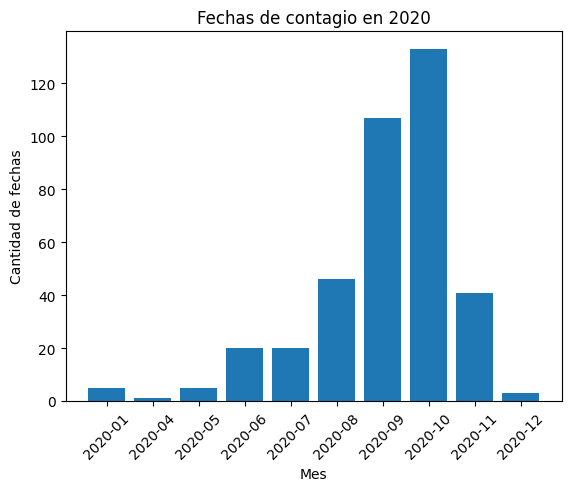

In [56]:
fechas_por_mes = df_por_ano.groupby(df_por_ano['FECHA_SIGN_SINTOMAS'].dt.strftime('%Y-%m'))['FECHA_SIGN_SINTOMAS'].count()

# Crear una gráfica de barras de las fechas por mes
plt.bar(fechas_por_mes.index, fechas_por_mes)
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Cantidad de fechas')
plt.title('Fechas de contagio en '+ str(ano))
plt.show()

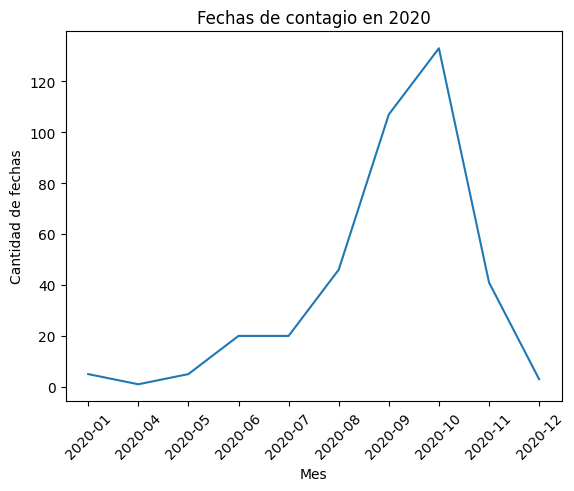

In [57]:
plt.plot(fechas_por_mes.index, fechas_por_mes)
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Cantidad de fechas')
plt.title('Fechas de contagio en '+ str(ano))
plt.show()

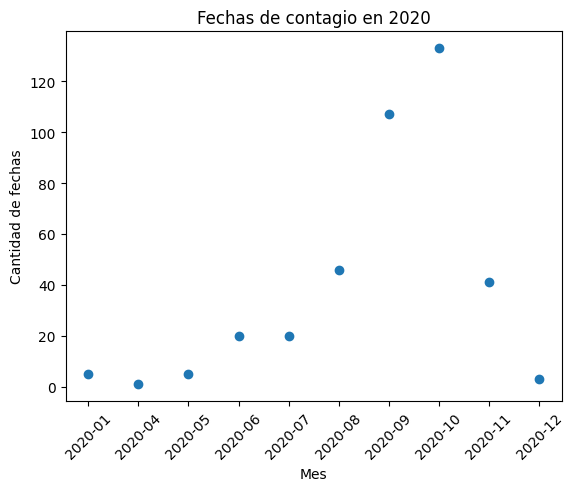

In [58]:
plt.scatter(fechas_por_mes.index, fechas_por_mes)
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Cantidad de fechas')
plt.title('Fechas de contagio en '+ str(ano))
plt.show()

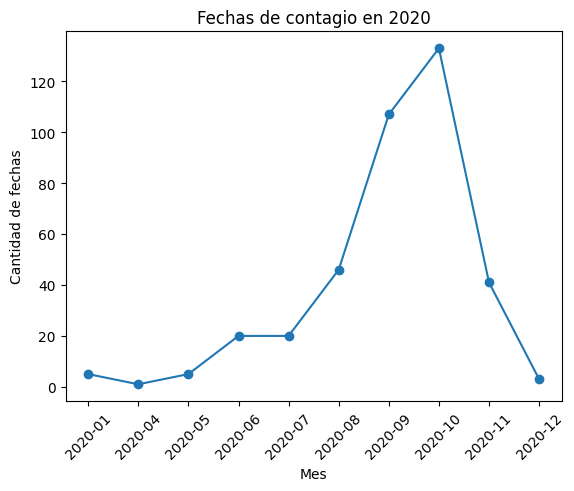

In [59]:
plt.plot(fechas_por_mes.index, fechas_por_mes, 'o-')
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Cantidad de fechas')
plt.title('Fechas de contagio en '+ str(ano))
plt.show()